<a href="https://colab.research.google.com/github/eshal26/store-sales-forecast/blob/main/Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Store Sales Forecast </h1>

<h2>Data Loading and installing packages</h2>

In [34]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from prophet.diagnostics import cross_validation, performance_metrics

In [35]:
df = pd.read_csv('train.csv')

In [36]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [37]:
df.shape

(3000888, 6)

In [38]:
df.dtypes

,0
id,int64
date,object
store_nbr,int64
family,object
sales,float64
onpromotion,int64


In [39]:
df=df[['date','sales']]

In [40]:
df.head()

,date,sales
0,2013-01-01,0.0
1,2013-01-01,0.0
2,2013-01-01,0.0
3,2013-01-01,0.0
4,2013-01-01,0.0


<h2>Preparing data for prophet</h2>

In [41]:
df['date'] = pd.to_datetime(df['date'])

In [42]:
df = df.groupby('date',as_index=False).mean()
print(df.head())

        date       sales
0 2013-01-01    1.409438
1 2013-01-02  278.390807
2 2013-01-03  202.840197
3 2013-01-04  198.911154
4 2013-01-05  267.873244


In [43]:
print(df.shape)

(1684, 2)


In [44]:
fig = px.line(df, x='date', y='sales', title='Sales Over Time')
fig.show()

In [45]:
df.columns = ['ds','y']

In [46]:
df.head()

,ds,y
0,2013-01-01,1.409438
1,2013-01-02,278.390807
2,2013-01-03,202.840197
3,2013-01-04,198.911154
4,2013-01-05,267.873244


<h2>Prediction using prophet</h2>

In [47]:
model=Prophet()

In [48]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/ec5ie11c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/72rj2lm2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75501', 'data', 'file=/tmp/tmpur4_vcl8/ec5ie11c.json', 'init=/tmp/tmpur4_vcl8/72rj2lm2.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modelu1j0xdxo/prophet_model-20240902150920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:09:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:09:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [50]:
future_dates = model.make_future_dataframe(periods=365,freq='d',include_history=True)
future_dates.shape

(2049, 1)

In [51]:
future_dates.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [52]:
prediction = model.predict(future_dates)

In [53]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,187.844545,131.316849,293.397024,187.844545,187.844545,24.379850,24.379850,24.379850,-38.256745,-38.256745,-38.256745,62.636595,62.636595,62.636595,0.0,0.0,0.0,212.224395
1,2013-01-02,188.053938,139.870226,294.128140,188.053938,188.053938,31.120387,31.120387,31.120387,-24.813380,-24.813380,-24.813380,55.933767,55.933767,55.933767,0.0,0.0,0.0,219.174325
2,2013-01-03,188.263331,84.402527,234.380516,188.263331,188.263331,-24.783170,-24.783170,-24.783170,-74.003953,-74.003953,-74.003953,49.220783,49.220783,49.220783,0.0,0.0,0.0,163.480162
3,2013-01-04,188.472725,122.997847,275.679091,188.472725,188.472725,10.575655,10.575655,10.575655,-32.022077,-32.022077,-32.022077,42.597732,42.597732,42.597732,0.0,0.0,0.0,199.048379
4,2013-01-05,188.682118,223.542764,376.735077,188.682118,188.682118,111.378516,111.378516,111.378516,75.219504,75.219504,75.219504,36.159012,36.159012,36.159012,0.0,0.0,0.0,300.060633


In [54]:

fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines',
                    name='Actual')])
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat'],
                   mode='lines+markers',
                    name='predicted'))
fig.show()


In [55]:
trace_open = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat"],
    mode = 'lines',
    name="Forecast"
)
trace_high = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_upper"],
    mode = 'lines',
    fill = "tonexty",
    line = {"color": "#57b8ff"},
    name="Higher uncertainty interval"
)
trace_low = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_lower"],
    mode = 'lines',
    fill = "tonexty",
    line = {"color": "#57b8ff"},
    name="Lower uncertainty interval"
)
trace_close = go.Scatter(
    x = df["ds"],
    y = df["y"],
    name="Data values"
)

#make list for all three scattle objects.
data = [trace_open,trace_high,trace_low,trace_close]
# Construct a new Layout object.
#title - It will display string as a title of graph
layout = go.Layout(title="Power consumption forecasting")
#A list or tuple of trace instances (e.g. [Scatter(…), Bar(…)]) or A single trace instance (e.g. Scatter(…), Bar(…), etc.)
#A list or tuple of dicts of string/value properties where: - The ‘type’ property specifies the trace type.

fig = go.Figure(data=data)
fig.show()

<h2>Parameter Grid</h2>
fining the best parameters for our model

In [56]:

# Define the parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'fourier_order': [60, 70, 80],
}

# Prepare to store the results
best_params = None
best_mae = float('inf')

# Loop over all combinations of the parameters
for cps in param_grid['changepoint_prior_scale']:
    for fo in param_grid['fourier_order']:

        # Initialize and fit the model with the current parameters
        model = Prophet(changepoint_prior_scale=cps, daily_seasonality=True)
        model.add_seasonality(name='yearly', period=365, fourier_order=fo)
        model.fit(df)

        # Cross-validate the model
        df_cv = cross_validation(model, initial='365 days', period='180 days', horizon='365 days')

        # Calculate performance metrics
        df_p = performance_metrics(df_cv, rolling_window=1)

        # Check if the current model is the best one
        if df_p['mae'].mean() < best_mae:
            best_mae = df_p['mae'].mean()
            best_params = {'changepoint_prior_scale': cps, 'fourier_order': fo}

# Output the best parameters
print(f"Best Parameters: {best_params}")
print(f"Best MAE: {best_mae:.3f}")


INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/qadg6q7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/2traw44g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4346', 'data', 'file=/tmp/tmpur4_vcl8/qadg6q7l.json', 'init=/tmp/tmpur4_vcl8/2traw44g.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_model5yc08uq8/prophet_model-20240902150922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2014-02-27 00:00:00 and 2016-08-15 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/ups9ibhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/lpvxw8h_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58427', 'data', 'file=/tmp/tmpur4_vcl8/ups9ibhg.json', 'init=/tmp/tmpur4_vcl8/lpvxw8h_.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modeleyifwfx9/prophet_model-20240902150922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/hne0bp85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/fdsr5p13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/srdrthan.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/exhy6o25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38438', 'data', 'file=/tmp/tmpur4_vcl8/srdrthan.json', 'init=/tmp/tmpur4_vcl8/exhy6o25.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modelf97wntx1/prophet_model-20240902150930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:09:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:09:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/1fc6b8xs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/q26o3m6q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/sqq2pchp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/qcrthbki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36906', 'data', 'file=/tmp/tmpur4_vcl8/sqq2pchp.json', 'init=/tmp/tmpur4_vcl8/qcrthbki.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modelmsjvtnol/prophet_model-20240902150936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:09:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/2ingukvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/9_ufscre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/j7a7hpc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/t4sxb41o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50267', 'data', 'file=/tmp/tmpur4_vcl8/j7a7hpc6.json', 'init=/tmp/tmpur4_vcl8/t4sxb41o.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modeln5bcj43d/prophet_model-20240902150945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/tcngc91n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/93tg_tma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/i45v5_38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/wsozjgj8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84608', 'data', 'file=/tmp/tmpur4_vcl8/i45v5_38.json', 'init=/tmp/tmpur4_vcl8/wsozjgj8.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_model1udilw2t/prophet_model-20240902150953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/h6y4d9d0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/v7g231fn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/zrujttfs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/ed9_vrpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57679', 'data', 'file=/tmp/tmpur4_vcl8/zrujttfs.json', 'init=/tmp/tmpur4_vcl8/ed9_vrpe.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modelj07dby3i/prophet_model-20240902151004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/kdljcgf1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/umg34lpy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/dvc61b5z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/z4_i2itv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3523', 'data', 'file=/tmp/tmpur4_vcl8/dvc61b5z.json', 'init=/tmp/tmpur4_vcl8/z4_i2itv.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modelf6z2dq45/prophet_model-20240902151016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/hmmg4v_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/d3vrrq9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/920qs013.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/7nhgvmuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5594', 'data', 'file=/tmp/tmpur4_vcl8/920qs013.json', 'init=/tmp/tmpur4_vcl8/7nhgvmuy.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modelhrz6ri7x/prophet_model-20240902151031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/uwiiqlb3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/14u15j7t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/b0qg8_ng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/6vvlaq1i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66167', 'data', 'file=/tmp/tmpur4_vcl8/b0qg8_ng.json', 'init=/tmp/tmpur4_vcl8/6vvlaq1i.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modeltp2vajd4/prophet_model-20240902151049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/kby5vle6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/akogck8o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best Parameters: {'changepoint_prior_scale': 0.01, 'fourier_order': 70}
Best MAE: 61.012


<h2>Predictions using new parameters</h2>

In [57]:
model1 = Prophet(changepoint_prior_scale=0.01, daily_seasonality=70)
model1.add_seasonality(name='yearly', period=365, fourier_order=fo)
model1.fit(df)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/4soknzgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpur4_vcl8/t4rplq_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71499', 'data', 'file=/tmp/tmpur4_vcl8/4soknzgw.json', 'init=/tmp/tmpur4_vcl8/t4rplq_z.json', 'output', 'file=/tmp/tmpur4_vcl8/prophet_modelnf0zn8ld/prophet_model-20240902151114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
prediction = model1.predict(future_dates)

<h2>Actual vs Predicted Visualisation</h2>

In [59]:

fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines',
                    name='Actual')])
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat'],
                   mode='lines+markers',
                    name='predicted'))
fig.show()


With uncertainity intervals

In [60]:
trace_open = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat"],
    mode = 'lines',
    name="Forecast"
)
trace_high = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_upper"],
    mode = 'lines',
    fill = "tonexty",
    line = {"color": "#57b8ff"},
    name="Higher uncertainty interval"
)
trace_low = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_lower"],
    mode = 'lines',
    fill = "tonexty",
    line = {"color": "#57b8ff"},
    name="Lower uncertainty interval"
)
trace_close = go.Scatter(
    x = df["ds"],
    y = df["y"],
    name="Data values"
)

#make list for all three scattle objects.
data = [trace_open,trace_high,trace_low,trace_close]
# Construct a new Layout object.
#title - It will display string as a title of graph
layout = go.Layout(title="Power consumption forecasting")
#A list or tuple of trace instances (e.g. [Scatter(…), Bar(…)]) or A single trace instance (e.g. Scatter(…), Bar(…), etc.)
#A list or tuple of dicts of string/value properties where: - The ‘type’ property specifies the trace type.

fig = go.Figure(data=data)
fig.show()

<h2>Seasonality</h2>

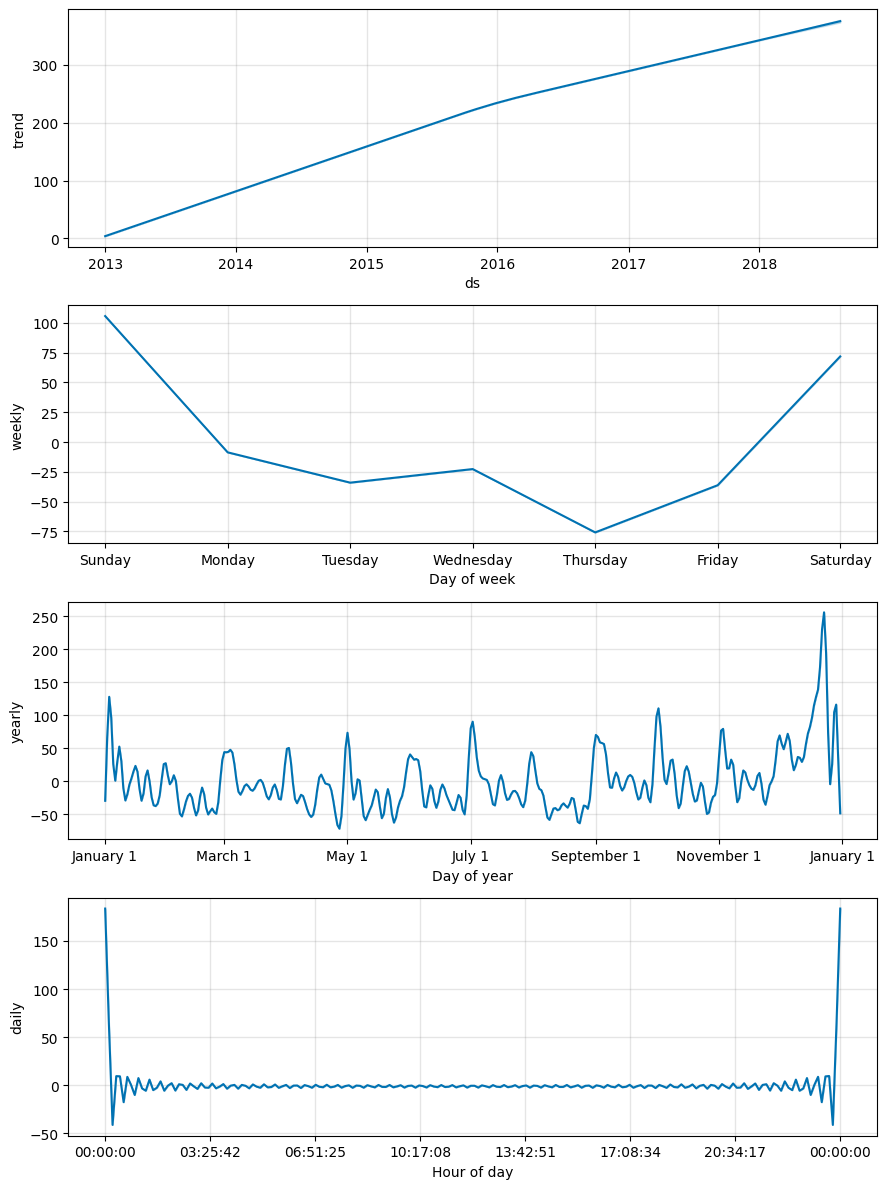

In [61]:
fig = model1.plot_components(prediction)


<h2>Residual Analysis</h2>

In [62]:
residuals = df['y'] - prediction['yhat']
import plotly.graph_objs as go

# Create a residuals plot
residual_trace = go.Scatter(
    x=df['ds'],  # Use the date for the x-axis
    y=residuals,  # Residuals on the y-axis
    mode='lines',
    name='Residuals'
)

# Construct a layout
layout = go.Layout(
    title="Residuals Plot",
    xaxis_title="Date",
    yaxis_title="Residuals"
)

# Create and show the figure
fig = go.Figure(data=[residual_trace], layout=layout)
fig.show()
